In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
training = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
training.head(5)
test.head(5)

In [4]:
training.info()
training.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print(training.isna().sum())
print(test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Combining the test and training data together

In [6]:
training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
mergedData = pd.concat([training,test])

In [7]:
mergedData.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
train_test        0
dtype: int64

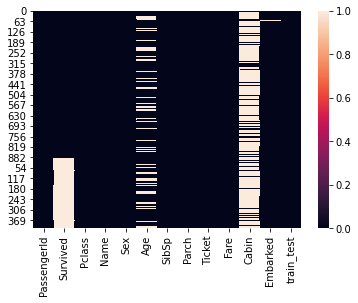

In [8]:
sns.heatmap(mergedData.isna())
plt.show()

# Data Analysis

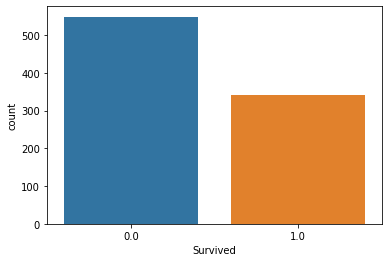

In [9]:
sns.countplot(x='Survived',data=mergedData)
plt.show()

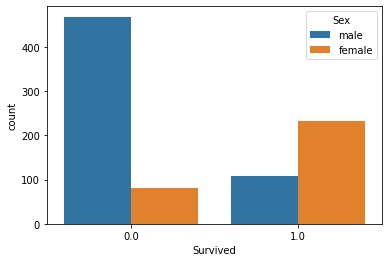

In [10]:
sns.countplot(x='Survived',data=mergedData, hue = 'Sex')
plt.show()

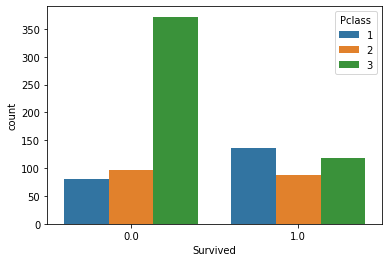

In [11]:
sns.countplot(x='Survived',data=mergedData, hue = 'Pclass')
plt.show()

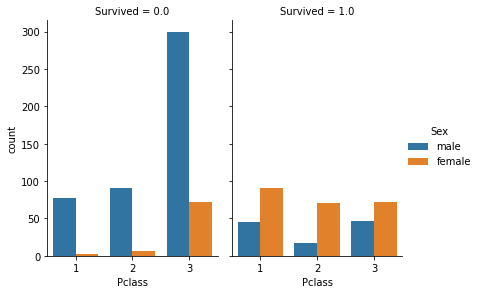

In [12]:
sns.catplot(x='Pclass',data=mergedData, hue = 'Sex', col="Survived", kind="count", height=4, aspect=.7)
plt.show()

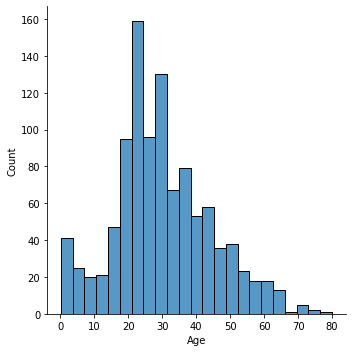

In [13]:
sns.displot(mergedData, x="Age")
plt.show()

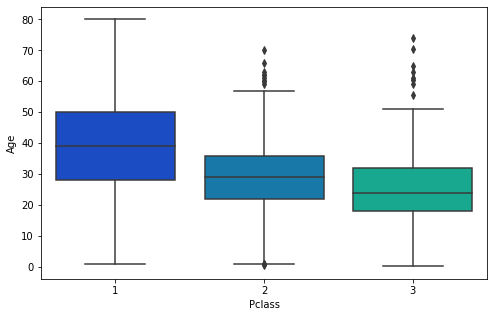

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Age', data=mergedData, palette='winter')
plt.show()   

# Handling missing values

In [15]:
# imputing value for the missing values in the Age attribute

def ageImpute(cols):

  Age = cols[0]
  Pclass = cols[1]    
  if pd.isnull(Age):
      if Pclass == 1:
          return 37
      elif Pclass == 2:
          return 29
      else:
          return 24
  else:
      return Age

In [16]:
mergedData['Age'] = mergedData[['Age', 'Pclass']].apply(ageImpute, axis=1)

In [17]:
mergedData['Fare'].fillna(mergedData['Fare'].mean(), inplace=True)

In [18]:
mergedData['Embarked'].groupby(mergedData['Embarked']).count()

Embarked
C    270
Q    123
S    914
Name: Embarked, dtype: int64

In [19]:
mergedData['Embarked'].fillna(value = "S", inplace=True)

In [20]:
# Droping the Cabin column

mergedData.drop('Cabin',axis=1,inplace=True)

In [21]:
mergedData.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
train_test       0
dtype: int64

# Preaparing Data for Model

In [24]:
mergedData = pd.get_dummies(mergedData, columns=['Sex', 'Embarked'], drop_first=True)

# Spliting the data again in Training and Test

In [26]:
nwTrain = mergedData[mergedData.train_test == 1].drop(['train_test'], axis =1)
nwTrain.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [27]:
nwTest = mergedData[mergedData.train_test == 0].drop(['train_test'], axis =1)
nwTest.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,NaN,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,1,0
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,1
2,894,NaN,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,1,0
3,895,NaN,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0,1
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,1


# Model Building

In [36]:

x= nwTrain.drop(['Survived', 'Name', 'Ticket'], axis = 1)
y= nwTrain.Survived

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Logistic Regression

In [42]:
lrModel = LogisticRegression(max_iter = 2000)
lrModel.fit(x_train,y_train)

lrpredict=lrModel.predict(x_test)
print("Accuracy for Logistic Regression on CV data: ",accuracy_score(y_test, lrpredict))

Accuracy for Logistic Regression on CV data:  0.8169491525423729


Naive Bayes

In [43]:
nbModel = GaussianNB()
nbModel.fit(x_train,y_train)

nbpredict=nbModel.predict(x_test)
print("Accuracy for Naive Bayes on CV data: ",accuracy_score(y_test, nbpredict))

Accuracy for Naive Bayes on CV data:  0.8033898305084746


Decision Tree

In [44]:
dtModel = tree.DecisionTreeClassifier()
dtModel.fit(x_train,y_train)

dtpredict=dtModel.predict(x_test)
print("Accuracy for Decision Tree on CV data: ",accuracy_score(y_test, dtpredict))

Accuracy for Decision Tree on CV data:  0.7288135593220338


KNN Classifier

In [46]:
knnModel = KNeighborsClassifier()
knnModel.fit(x_train,y_train)
 
knnpredict=knnModel.predict(x_test)
print("Accuracy for KNN Classifier on CV data: ",accuracy_score(y_test, knnpredict))

Accuracy for KNN Classifier on CV data:  0.6440677966101694


Random Forest

In [47]:
rfModel = RandomForestClassifier(random_state=42)
rfModel.fit(x_train,y_train)

rfpredict=rfModel.predict(x_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test, rfpredict))

Accuracy for Random Forest on CV data:  0.8101694915254237


Support Vector Classification

In [48]:
svcModel = SVC(probability = True)
svcModel.fit(x_train,y_train)

svcpredict=svcModel.predict(x_test)
print("Accuracy for Support Vector Classification on CV data: ",accuracy_score(y_test, svcpredict))

Accuracy for Support Vector Classification on CV data:  0.6169491525423729


Grid Search

In [49]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfModel , param_grid= param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 500}

In [50]:
rfclModel = RandomForestClassifier(random_state=42, criterion='gini', max_depth=4, max_features='auto', n_estimators= 500)
rfclModel.fit(x_train,y_train)

rfclpredict=rfclModel.predict(x_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test, rfclpredict))

Accuracy for Random Forest on CV data:  0.8271186440677966


Accuracy for Random Forest on CV data:  0.8271186440677966

# Prediction

In [54]:
test_df = nwTest.drop(['Survived', 'Name', 'Ticket'], axis = 1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [60]:
prediction = rfclModel.predict(test_df).astype(int)
prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Output file

In [61]:
op=pd.DataFrame(test['PassengerId'])
op['Survived']= prediction
#op.to_csv("op_rf.csv", index=False)

In [62]:
op.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [64]:
op.to_csv("titanic_rf.csv", index=False)

# After submission got the score 0.77990